In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [6]:
df = pd.read_csv("Airline.csv")


In [8]:
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,...,flight_date,weekday,is_weekend,season,is_holiday,competitor_avg_price,load_factor,demand_score,price_category,last_minute_booking
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,...,2025-07-02,Wednesday,0,Monsoon,0,5878.31,99.4,1.5,Medium,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,...,2025-07-02,Wednesday,0,Monsoon,0,6221.31,98.4,1.3,Medium,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,...,2025-07-02,Wednesday,0,Monsoon,1,6094.18,99.1,1.8,Medium,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,...,2025-07-02,Wednesday,0,Monsoon,0,6013.75,98.5,1.4,Medium,1
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,...,2025-07-02,Wednesday,0,Monsoon,0,5750.16,99.3,1.4,Medium,1


In [14]:
np.random.seed(42)
df["flight_date"] = pd.to_datetime(
    np.random.choice(
        pd.date_range(start="2025-01-01", end="2025-12-31"),
        size=len(df)
    )
)

In [18]:
df["month"] = df["flight_date"].dt.month

In [22]:
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Summer", 4: "Summer", 5: "Summer",
    6: "Monsoon", 7: "Monsoon", 8: "Monsoon",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
}
df["season"] = df["month"].map(season_map)


In [26]:
print(df["season"].value_counts())
print(df.head())

season
Monsoon    75972
Summer     75749
Autumn     74458
Winter     73974
Name: count, dtype: int64
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  ...    weekday  \
0          Night           Mumbai  Economy      2.17  ...  Wednesday   
1        Morning           Mumbai  Economy      2.33  ...  Wednesday   
2  Early_Morning           Mumbai  Economy      2.17  ...  Wednesday   
3      Afternoon           Mumbai  Economy      2.25  ...  Wednesday   
4        Morning           Mumbai  Economy      2.33  ...  Wednesday   

   is_weekend  season is_holiday  competitor_avg_pr

In [30]:
df.describe()

,Unnamed: 0,duration,days_left,price,flight_date,is_weekend,is_holiday,competitor_avg_price,load_factor,demand_score,last_minute_booking,month
count,300153.000000,300153.000000,300153.000000,300153.000000,300153,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523,2025-07-01 23:04:42.491929088,0.293457,0.099702,20891.934745,68.125297,1.368582,0.033986,6.524752
min,0.000000,0.830000,1.000000,1105.000000,2025-01-01 00:00:00,0.000000,0.000000,1050.160000,30.000000,1.100000,0.000000,1.000000
25%,75038.000000,6.830000,15.000000,4783.000000,2025-04-02 00:00:00,0.000000,0.000000,4784.120000,53.800000,1.200000,0.000000,4.000000
50%,150076.000000,11.250000,26.000000,7425.000000,2025-07-02 00:00:00,0.000000,0.000000,7429.970000,71.500000,1.400000,0.000000,7.000000
75%,225114.000000,16.170000,38.000000,42521.000000,2025-10-01 00:00:00,1.000000,0.000000,42544.460000,84.400000,1.500000,0.000000,10.000000
max,300152.000000,49.830000,49.000000,123071.000000,2025-12-31 00:00:00,1.000000,1.000000,123269.820000,99.500000,2.000000,1.000000,12.000000
std,86646.852011,7.191997,13.561004,22697.767366,NaN,0.455347,0.299603,22719.152866,19.810965,0.203172,0.181193,3.445216


In [34]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'flight_date', 'weekday', 'is_weekend', 'season',
       'is_holiday', 'competitor_avg_price', 'load_factor', 'demand_score',
       'price_category', 'last_minute_booking', 'month'],
      dtype='object')

In [38]:
df["total_revenue"] = df["price"] 

In [42]:
df["last_minute_booking"] = df["days_left"].apply(lambda x: 1 if x < 3 else 0)


In [46]:
def price_bucket(price):
    if price < 4000:
        return "Low"
    elif price < 7000:
        return "Medium"
    else:
        return "High"

df["price_category"] = df["price"].apply(price_bucket)

In [50]:
df_model = df.drop(columns=["Unnamed: 0", "flight", "flight_date", "month"])

In [54]:
X = df_model.drop(columns="price")
y = df_model["price"]


In [58]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include="object").columns.tolist()

In [62]:
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])


In [71]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [75]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 0.31148056837302324
RMSE: 8.920384547414722


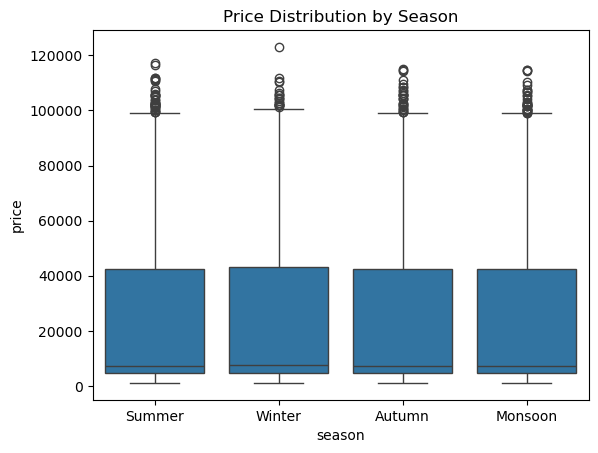

In [79]:
sns.boxplot(data=df, x="season", y="price")
plt.title("Price Distribution by Season")
plt.show()

C:\Users\shrad\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


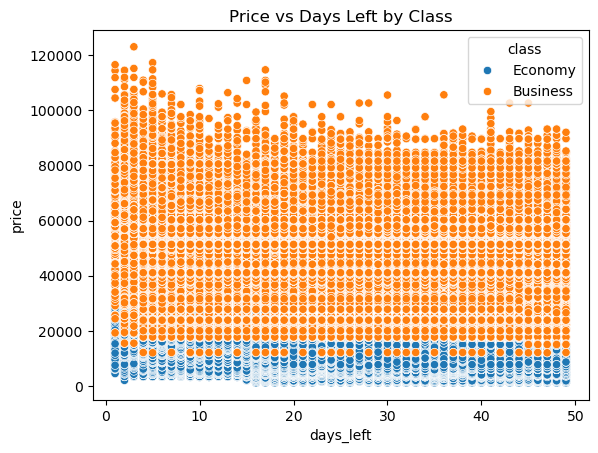

In [82]:
sns.scatterplot(data=df, x="days_left", y="price", hue="class")
plt.title("Price vs Days Left by Class")
plt.show()


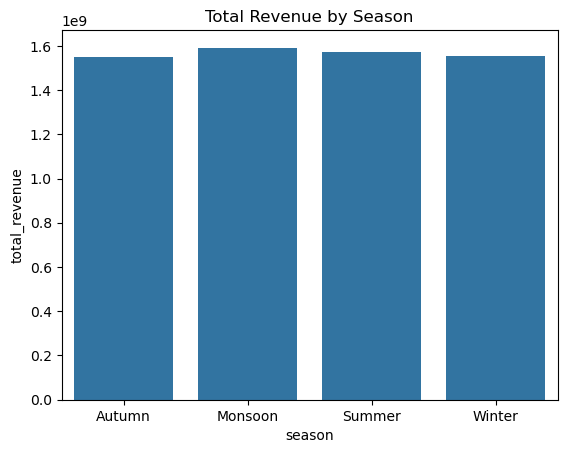

In [86]:
rev_by_season = df.groupby("season")["total_revenue"].sum().reset_index()
sns.barplot(data=rev_by_season, x="season", y="total_revenue")
plt.title("Total Revenue by Season")
plt.show()

In [90]:
print("\nSeason Distribution:")
print(df["season"].value_counts())


Season Distribution:
season
Monsoon    75972
Summer     75749
Autumn     74458
Winter     73974
Name: count, dtype: int64


In [94]:
print("\nTotal Revenue by Season:")
print(df.groupby("season")["total_revenue"].sum())


Total Revenue by Season:
season
Autumn     1549229397
Monsoon    1591533159
Summer     1574176185
Winter     1555155534
Name: total_revenue, dtype: int64


In [98]:
print("\nTotal Revenue by Route:")
print(df.groupby(["source_city", "destination_city"])["total_revenue"].sum().sort_values(ascending=False).head(10))


Total Revenue by Route:
source_city  destination_city
Bangalore    Mumbai              299261197
Mumbai       Bangalore           298260354
Delhi        Mumbai              295931282
Mumbai       Kolkata             282022007
             Delhi               277303264
Kolkata      Mumbai              253178558
Delhi        Bangalore           250537591
             Kolkata             245439530
Bangalore    Delhi               243801907
             Kolkata             235658614
Name: total_revenue, dtype: int64


In [102]:
print("\nTotal Revenue (Overall):")
print(df["total_revenue"].sum())



Total Revenue (Overall):
6270094275


In [106]:
print("\nSeason Distribution:")
print(df["season"].value_counts())

print("\nTotal Revenue by Season:")
print(df.groupby("season")["total_revenue"].sum())

print("\nTotal Revenue by Route:")
print(df.groupby(["source_city", "destination_city"])["total_revenue"].sum().sort_values(ascending=False).head(10))

print("\nTotal Revenue (Overall):")
print(df["total_revenue"].sum())



Season Distribution:
season
Monsoon    75972
Summer     75749
Autumn     74458
Winter     73974
Name: count, dtype: int64

Total Revenue by Season:
season
Autumn     1549229397
Monsoon    1591533159
Summer     1574176185
Winter     1555155534
Name: total_revenue, dtype: int64

Total Revenue by Route:
source_city  destination_city
Bangalore    Mumbai              299261197
Mumbai       Bangalore           298260354
Delhi        Mumbai              295931282
Mumbai       Kolkata             282022007
             Delhi               277303264
Kolkata      Mumbai              253178558
Delhi        Bangalore           250537591
             Kolkata             245439530
Bangalore    Delhi               243801907
             Kolkata             235658614
Name: total_revenue, dtype: int64

Total Revenue (Overall):
6270094275


In [112]:
from sklearn.linear_model import LinearRegression


In [127]:
from sklearn.ensemble import GradientBoostingRegressor


In [131]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, reg in models.items():
    model = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", reg)
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {"MAE": mae, "RMSE": rmse}
    print(f"\n{name} Results")
    print("MAE:", mae)
    print("RMSE:", rmse)



Linear Regression Results
MAE: 1.61691313741257e-10
RMSE: 1.9643782130264548e-10

Random Forest Results
MAE: 0.31148056837302324
RMSE: 8.920384547414722

Gradient Boosting Results
MAE: 63.76782026104983
RMSE: 103.16033149163815


In [135]:
results_df = pd.DataFrame(results).T.reset_index()
results_df.columns = ["Model", "MAE", "RMSE"]

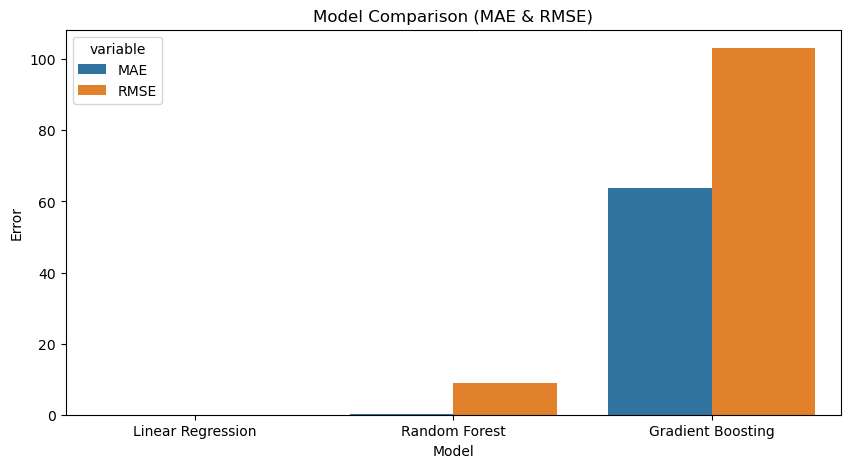

In [139]:
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison (MAE & RMSE)")
plt.ylabel("Error")
plt.show()

In [143]:
import joblib

In [151]:
best_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])
best_model.fit(X, y)
joblib.dump(best_model, "best_pricing_model.pkl")

['best_pricing_model.pkl']

In [157]:
def predict_price(new_data):
    df_new = pd.DataFrame([new_data])
    return best_model.predict(df_new)[0]

In [163]:
sample_input = {
    'airline': 'Indigo',
    'source_city': 'Delhi',
    'departure_time': 'Evening',
    'stops': 'zero',
    'arrival_time': 'Night',
    'destination_city': 'Mumbai',
    'class': 'Economy',
    'duration': 2.5,
    'days_left': 10,
    'season': 'Winter',
    'last_minute_booking': 0,
    'price_category': 'Medium',
    'load_factor': 0.85,
    'is_holiday': 0,
    'demand_score': 0.65,
    'is_weekend': 1,
    'total_revenue': 6000,
    'competitor_avg_price': 6200,
    'weekday': 'Friday'
}


In [167]:
predicted_price = predict_price(sample_input)
print("Predicted Price:", predicted_price)


Predicted Price: 6000.39


In [172]:
import joblib



In [182]:
joblib.dump(best_model, "dynamic_pricing_model.pkl",compress=9)

['dynamic_pricing_model.pkl']

In [186]:
import gzip
import shutil

In [190]:
with open("dynamic_pricing_model.pkl", "rb") as f_in:
    with gzip.open("dynamic_pricing_model.pkl.gz", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

In [194]:
import pickle
import gzip


In [215]:
with gzip.open("dynamic_model.pkl.gz", "wb") as f:
    pickle.dump(best_model, f, protocol=pickle.HIGHEST_PROTOCOL)

In [219]:
attrs = ["feature_importances_", "estimators_", "oob_score_", "X_train_", "y_train_"]
for attr in attrs:
    if hasattr(best_model, attr):
        delattr(best_model, attr)

In [224]:
from sklearn.ensemble import RandomForestRegressor
small_model = RandomForestRegressor(n_estimators=50, random_state=42)

In [230]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


In [234]:
small_model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))
])


In [239]:
small_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'days_left',
                                                   'is_weekend', 'is_holiday',
                                                   'competitor_avg_price',
                                                   'load_factor',
                                                   'demand_score',
                                                   'last_minute_booking',
                                                   'total_revenue']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city', 'class',
                                                   'weekday', 'season',
                                                   'price_category'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50,
                                       random_state=42))])

In [241]:
import joblib
joblib.dump(small_model, "dynamic_pricing_small.pkl", compress=9)


['dynamic_pricing_small.pkl']